fit takes np , tf data tensor data both train test

In [1]:
import numpy as np
from random import randint 
from sklearn.utils import shuffle 
from sklearn.preprocessing import MinMaxScaler 

In [2]:
#datacreation
train_labels = []
train_samples = []
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,110)
  train_samples.append(random_older)
  train_labels.append(0)
  pass
#85 percent
for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,110)
  train_samples.append(random_older)
  train_labels.append(0)
  pass


In [ ]:
!nvidia-smi

Mon Sep 28 18:03:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels,train_samples = shuffle(train_labels,train_samples)

#fit takes numpy array 

In [4]:
# normalise 
scaler = MinMaxScaler(feature_range=(0,1))
# doesnt take 1 d data
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))




In [5]:
# for i in scaled_train_samples:
#   print(i)

In [6]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation,Dense 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy




In [7]:
phus_gpy = tf.config.experimental.list_physical_devices('GPU')
print("Num of GPU available ",len(phus_gpy))





Num of GPU available  1


In [8]:
model = Sequential([
      Dense(units = 16,input_shape = (1,)  ,activation='relu'            ),
      Dense(units = 32 ,activation='relu'            ),
      Dense(units = 2,activation='softmax'            ),

])
# 1->16->32->2



In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(x = scaled_train_samples,y=train_labels,validation_split=0.1, batch_size=10,epochs = 30,shuffle=True,verbose = 2)
#training data is suffle ,split occurs before shuffle happens therefore not correct split
 


Epoch 1/30
189/189 - 0s - loss: 0.7097 - accuracy: 0.4862 - val_loss: 0.6893 - val_accuracy: 0.7476
Epoch 2/30
189/189 - 0s - loss: 0.6737 - accuracy: 0.6862 - val_loss: 0.6576 - val_accuracy: 0.7190
Epoch 3/30
189/189 - 0s - loss: 0.6430 - accuracy: 0.7185 - val_loss: 0.6252 - val_accuracy: 0.7810
Epoch 4/30
189/189 - 0s - loss: 0.6102 - accuracy: 0.7704 - val_loss: 0.5916 - val_accuracy: 0.7952
Epoch 5/30
189/189 - 0s - loss: 0.5770 - accuracy: 0.8148 - val_loss: 0.5584 - val_accuracy: 0.8143
Epoch 6/30
189/189 - 0s - loss: 0.5432 - accuracy: 0.8328 - val_loss: 0.5237 - val_accuracy: 0.8333
Epoch 7/30
189/189 - 0s - loss: 0.5082 - accuracy: 0.8587 - val_loss: 0.4881 - val_accuracy: 0.8667
Epoch 8/30
189/189 - 0s - loss: 0.4725 - accuracy: 0.8762 - val_loss: 0.4526 - val_accuracy: 0.8810
Epoch 9/30
189/189 - 0s - loss: 0.4368 - accuracy: 0.9021 - val_loss: 0.4177 - val_accuracy: 0.8952
Epoch 10/30
189/189 - 0s - loss: 0.4020 - accuracy: 0.9143 - val_loss: 0.3839 - val_accuracy: 0.9000

In [ ]:
#validation set train subset validate on validate data
# pass validation set daat in fit 

In [ ]:
# verify on #test data

In [11]:
#datacreation
test_labels = []
test_samples = []
for i in range(10):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,110)
  test_samples.append(random_older)
  test_labels.append(0)
  pass
#95 percent
for i in range(200):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,110)
  test_samples.append(random_older)
  test_labels.append(0)
  pass

In [12]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels , test_samples = shuffle(test_labels,test_samples)

In [13]:
scaled_test_sampels = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
#PREDICT

In [14]:
predict_ions = model.predict(x = scaled_test_sampels , batch_size = 10,verbose = 0)

In [15]:
rounded_predictions = np.argmax(predict_ions,axis =-1)

In [ ]:
for i in predict_ions:
  print(i)

#prob of each index to be true

[0.7836686  0.21633145]
[0.7836686  0.21633145]
[9.9999928e-01 7.6447344e-07]
[9.9997807e-01 2.1879228e-05]
[6.0099381e-04 9.9939895e-01]
[6.104104e-04 9.993895e-01]
[9.9999893e-01 1.1280308e-06]
[9.9996567e-01 3.4301185e-05]
[0.6979423 0.3020577]
[9.9999952e-01 5.2462894e-07]
[7.355984e-04 9.992644e-01]
[9.9999928e-01 7.6447344e-07]
[6.719902e-04 9.993280e-01]
[0.13465442 0.86534554]
[0.01037062 0.9896293 ]
[9.992021e-01 7.979209e-04]
[9.9999750e-01 2.4749888e-06]
[0.9882811  0.01171887]
[0.05953952 0.94046044]
[0.7836686  0.21633145]
[9.9999976e-01 2.7470631e-07]
[9.999999e-01 7.780199e-08]
[0.00271208 0.997288  ]
[0.00271208 0.997288  ]
[6.9125125e-04 9.9930871e-01]
[7.8278914e-04 9.9921715e-01]
[0.00127516 0.9987249 ]
[5.8259367e-04 9.9941742e-01]
[9.9949086e-01 5.0909875e-04]
[5.9172243e-04 9.9940825e-01]
[0.00663981 0.9933602 ]
[0.99693227 0.00306776]
[9.9999893e-01 1.1280308e-06]
[9.992021e-01 7.979209e-04]
[9.9999750e-01 2.4749888e-06]
[9.9999988e-01 1.4619197e-07]
[9.996753e-0

In [ ]:
# onfusion matrix 

In [16]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix 
import itertools 
import matplotlib.pyplot as plt


In [17]:
cn = confusion_matrix(y_true=test_labels,y_pred = rounded_predictions)
def plot_confusion_matrix(cm,classes,normalize = False , title = 'Confusion matrix',cmap = plt.cm.Blues):

  plt.imshow(cm,interpolation='nearest',cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]
    print("Normalised confusion matrix")

  else:
    print("Confusion matrix without normalisation")

  print(cm) 
  thresh = cm.max()/2 
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1]) ):
    plt.text(j,i,cm[i,j],horizontalalignment = "center",color = "white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')




  pass 


Confusion matrix without normalisation
[[210   0]
 [  6 204]]


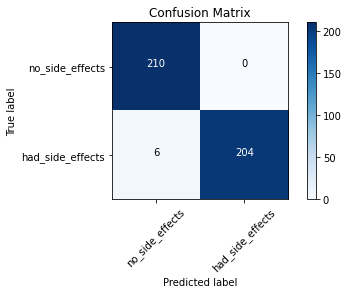

In [18]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm = cn , classes = cm_plot_labels,title = 'Confusion Matrix')

In [ ]:
#save and load keras model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [20]:
# h5 extension 

model.save("mdeical_fake_data_shit.h5")

In [ ]:
# arcghitecture 
# weights 
# training configureaiotn 
# state of optimiser allowing where you left off

# //everything

In [21]:
from tensorflow.keras.models import load_model 
new_model = load_model("mdeical_fake_data_shit.h5")

In [22]:
new_model.summary()
new_model.get_weights()
new_model.optimizer


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#to json 

# only architecture no wieghts
json_string = model.to_json()

# save as yaml to_yaml

In [23]:
json_string

NameError: ignored

In [ ]:
from tensorflow.keras.models import model_from_json 
model_architecture = model_from_json(json_string)

In [24]:
#save only wiehgts find architecture
model.save_weights("name1.h5")



In [25]:
modelw = Sequential([
      Dense(units = 16,input_shape = (1,)  ,activation='relu'            ),
      Dense(units = 32 ,activation='relu'            ),
      Dense(units = 2,activation='softmax'            ),

])

In [26]:
modelw.load_weights('name1.h5')
modelw.get_weights()

[array([[-0.13556927, -0.4137565 ,  0.32676056,  0.01228958,  0.33868626,
         -0.5520497 , -0.4858557 ,  0.32679173,  0.49510822,  0.01057994,
          0.59376776, -0.06134969,  0.3518627 ,  0.571562  ,  0.47345784,
          0.63477015]], dtype=float32),
 array([ 0.        ,  0.        , -0.10196424, -0.01231703,  0.36462176,
         0.        ,  0.        , -0.09808935, -0.13222194,  0.23707022,
        -0.11251901,  0.        , -0.10432453, -0.1577019 , -0.11638886,
        -0.16825084], dtype=float32),
 array([[-3.00946027e-01,  1.07691437e-01, -2.76578307e-01,
          4.82226610e-02, -1.34107903e-01,  2.69368500e-01,
          1.54264539e-01,  2.33674794e-01, -3.11129034e-01,
         -1.97007343e-01, -2.00559571e-01,  3.17166477e-01,
          7.98967779e-02,  1.84272319e-01,  2.16522545e-01,
         -3.16040069e-01,  2.97459573e-01,  1.04329467e-01,
          1.73331529e-01,  7.57527351e-02, -1.58606678e-01,
          2.83483833e-01,  1.25748485e-01,  3.13219756e-01,
 

In [ ]:
1:04:00

In [27]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete7462IC/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [28]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [31]:
train = raw_train.map(format_example)
train = tfds.as_numpy(train)
validation = raw_validation.map(format_example)
validation = tfds.as_numpy(validation)

test = raw_test.map(format_example)
test = tfds.as_numpy(test)


In [34]:
for ex in train:
  print(ex)

Streaming output truncated to the last 5000 lines.
        [-0.3235294 , -0.3215686 , -0.34509802],
        ...,
        [-0.9946875 , -0.98684436, -1.        ],
        [-0.9888051 , -0.980962  , -1.        ],
        [-0.9490196 , -0.9411765 , -0.98039216]],

       [[-0.5271324 , -0.5898775 , -0.69183826],
        [-0.49291056, -0.5223223 , -0.58898896],
        [-0.31960782, -0.31764704, -0.34117645],
        ...,
        [-0.9440931 , -0.93625   , -0.97546566],
        [-0.93625   , -0.92840683, -0.9676225 ],
        [-0.93112135, -0.9232782 , -0.9624939 ]],

       [[-0.5490809 , -0.611826  , -0.7137868 ],
        [-0.5245405 , -0.5539522 , -0.62061894],
        [-0.3166973 , -0.31473652, -0.33826593],
        ...,
        [-0.8998775 , -0.89203435, -0.93125004],
        [-0.88615197, -0.87830883, -0.9175245 ],
        [-0.91265315, -0.90481   , -0.9440257 ]],

       ...,

       [[-0.29941788, -0.33887866, -0.42919728],
        [-0.29537377, -0.33483455, -0.42515317],
        [